<a href="https://colab.research.google.com/github/dinasquare/Emotion_Recognition/blob/main/emomeepmop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zipo = zipfile.ZipFile("/content/drive/MyDrive/Datasets/emoemoiamsad.zip" , 'r')
zipo.extractall()
zipo.close()

In [ ]:
import zipfile
import os

# Path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Datasets/emoemoiamsad.zip'

# Destination directory to extract the zip file
extract_dir = '/content/dataset'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
print("Files extracted to:", extract_dir)
print("Contents:", os.listdir(extract_dir))


Files extracted to: /content/dataset
Contents: ['AffectNet']


In [ ]:
import os

for dirpath,dirnames, filenames in os.walk("/content/AffectNet"):
  print(f"There are{len(dirnames)} files in path {dirpath}")

There are3 files in path /content/AffectNet
There are8 files in path /content/AffectNet/test
There are0 files in path /content/AffectNet/test/4
There are0 files in path /content/AffectNet/test/1
There are0 files in path /content/AffectNet/test/2
There are0 files in path /content/AffectNet/test/7
There are0 files in path /content/AffectNet/test/5
There are0 files in path /content/AffectNet/test/0
There are0 files in path /content/AffectNet/test/6
There are0 files in path /content/AffectNet/test/3
There are8 files in path /content/AffectNet/val
There are0 files in path /content/AffectNet/val/4
There are0 files in path /content/AffectNet/val/1
There are0 files in path /content/AffectNet/val/2
There are0 files in path /content/AffectNet/val/7
There are0 files in path /content/AffectNet/val/5
There are0 files in path /content/AffectNet/val/0
There are0 files in path /content/AffectNet/val/6
There are0 files in path /content/AffectNet/val/3
There are8 files in path /content/AffectNet/train
T

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
train_dir = "/content/AffectNet/train"
val_dir = "/content/AffectNet/val"
test_dir = "/content/AffectNet/test"
img_size = (299,299)

In [ ]:
# Define class labels
class_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', "Surprise"]

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=img_size,
                                                                 label_mode="categorical",
                                                                #  class_names=class_labels,
                                                                 color_mode="rgb",
                                                                 batch_size=32,
                                                                 seed=42)

Found 37553 files belonging to 8 classes.


In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                 image_size=img_size,
                                                                 label_mode="categorical",
                                                                #  class_names=class_labels,
                                                                 color_mode="rgb",
                                                                 batch_size=32,
                                                                 seed=42)

Found 800 files belonging to 8 classes.


In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=img_size,
                                                                 label_mode="categorical",
                                                                #  class_names=class_labels,
                                                                 color_mode="rgb",
                                                                 batch_size=32,
                                                                 seed=42)

Found 3200 files belonging to 8 classes.


In [ ]:
model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(299,299,3),
    pooling='avg',
    classes=8,
    classifier_activation='softmax'
)

# Add your own classification layers on top of the base model
x = model.output
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(8, activation='softmax')(x)  # Adjust the number of units to match your number of classes

# Create the final model
model = tf.keras.models.Model(inputs=model.input, outputs=predictions)
model.compile(loss='CategoricalCrossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

model.fit(train_data,
          validation_data=val_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_steps=len(val_data),
          batch_size=15)

87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/5
1174/1174 [==============================] - 591s 461ms/step - loss: 1.7126 - accuracy: 0.3175 - val_loss: 1.8040 - val_accuracy: 0.2875
Epoch 2/5
1174/1174 [==============================] - 536s 456ms/step - loss: 1.4136 - accuracy: 0.4645 - val_loss: 1.5044 - val_accuracy: 0.4275
Epoch 3/5
1174/1174 [==============================] - 537s 456ms/step - loss: 1.2742 - accuracy: 0.5232 - val_loss: 1.4374 - val_accuracy: 0.4837
Epoch 4/5
1174/1174 [==============================] - 531s 452ms/step - loss: 1.1878 - accuracy: 0.5562 - val_loss: 1.4656 - val_accuracy: 0.5038
Epoch 5/5
1174/1174 [==============================] - 535s 455ms/step - loss: 1.1098 - accuracy: 0.5910 - val_loss: 1.4206 - val_accuracy: 0.4950


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save.keras('model_emo_1')

AttributeError: 'function' object has no attribute 'keras'

In [ ]:
prediction=model.predict(test_data)

100/100 [==============================] - 15s 149ms/step


In [ ]:
model.evaluate(test_data)

100/100 [==============================] - 15s 142ms/step - loss: 1.5123 - accuracy: 0.4625


[1.5122610330581665, 0.4625000059604645]

In [ ]:
import matplotlib.pyplot as plt

(-0.5, 298.5, 298.5, -0.5)

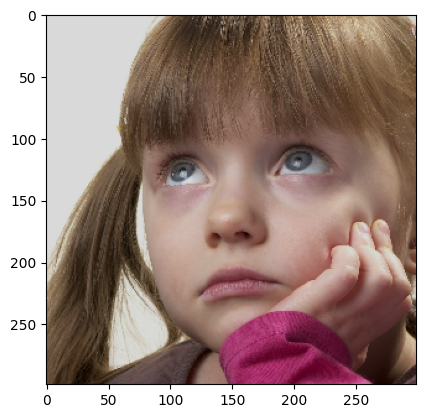

In [ ]:
image=tf.io.read_file("/content/AffectNet/test/4/image0000006.jpg")
image=tf.image.decode_image(image,channels=3)
image=tf.image.resize(image,(299,299))
# image=tf.image.resize(image,(224,224))
image=image/299.

plt.imshow(image)
plt.axis(True)

In [ ]:
prediction = model.predict(tf.expand_dims(image, axis=0))
prediction

NameError: name 'model' is not defined

In [ ]:
prediction.argmax()

4

In [ ]:
class_labels[prediction.argmax()]

'Happy'

##EfficientNetB0

In [ ]:
model_1 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    # input_shape=(255,255,3),
    # pooling='avg',
    classes=8,
    classifier_activation='softmax'
)

# Add your own classification layers on top of the base model
x = model_1.output
x = tf.keras.layers.GlobalAveragePooling2D()(x) # Added a GlobalAveragePooling2D layer to reduce the spatial dimensions
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(8, activation='softmax')(x)  # Adjust the number of units to match your number of classes

# Create the final model
model_1 = tf.keras.models.Model(inputs=model_1.input, outputs=predictions)
model_1.compile(loss='CategoricalCrossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

history = model_1.fit(train_data,
          validation_data=val_data,
          epochs=5,
          steps_per_epoch=0.15*len(train_data),
          validation_steps=0.15*len(val_data),
          batch_size=32)

16705208/16705208 [==============================] - 2s 0us/step


Epoch 1/5
176/176 [==============================] - 133s 492ms/step - loss: 1.7041 - accuracy: 0.3545 - val_loss: 1.8615 - val_accuracy: 0.3516
Epoch 2/5
176/176 [==============================] - 82s 466ms/step - loss: 1.4612 - accuracy: 0.4506 - val_loss: 1.8012 - val_accuracy: 0.4219
Epoch 3/5
176/176 [==============================] - 83s 470ms/step - loss: 1.3716 - accuracy: 0.4871 - val_loss: 1.3543 - val_accuracy: 0.5078
Epoch 4/5
176/176 [==============================] - 84s 479ms/step - loss: 1.3261 - accuracy: 0.5014 - val_loss: 1.3217 - val_accuracy: 0.5000
Epoch 5/5
176/176 [==============================] - 83s 473ms/step - loss: 1.3004 - accuracy: 0.5122 - val_loss: 1.4640 - val_accuracy: 0.4453


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

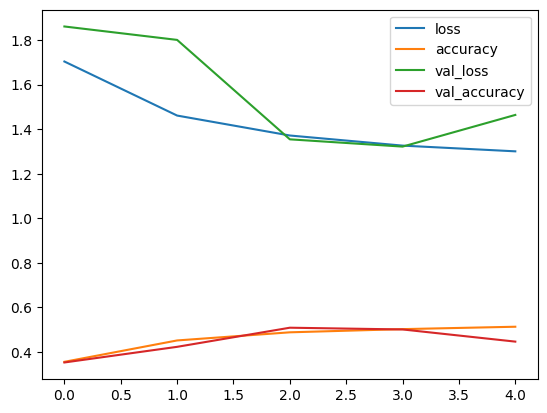

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
prediction=model_1.predict(test_data)

100/100 [==============================] - 17s 146ms/step


In [ ]:
model_1.evaluate(test_data)

100/100 [==============================] - 14s 130ms/step - loss: 1.4064 - accuracy: 0.4825


[1.4064111709594727, 0.48249998688697815]

In [ ]:
prediction = model_1.predict(tf.expand_dims(image, axis=0))
prediction

1/1 [==============================] - 3s 3s/step


array([[0.30490565, 0.04343509, 0.12407216, 0.2592086 , 0.14788824,
        0.04361419, 0.06450318, 0.01237294]], dtype=float32)

In [ ]:
prediction.argmax()

0

##Data Augmetation

In [ ]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    # layers.RandomContrast(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # layers.Rescaling(1./255)
])

/content/AffectNet/test/2


(-0.5, 779.5, 915.5, -0.5)

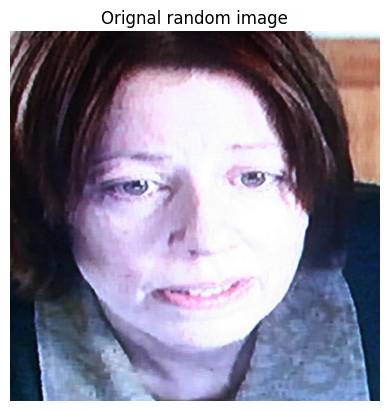

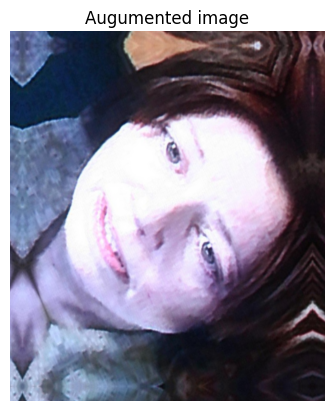

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# target_class = random.choice(train_data.class_names)
target_dir = "/content/AffectNet/test/2"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f"Orignal random image")
print(target_dir)

# Now let's plot our augmented random image
augmented_img = data_aug(img)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f"Augumented image")
plt.axis(False)

In [ ]:
# model = tf.keras.applications.InceptionV3(
#     include_top=False,
#     weights='imagenet',
#     input_tensor=None,
#     input_shape=(299,299,3),
#     pooling='avg',
#     classes=8,
#     classifier_activation='softmax'
# )

# # Add your own classification layers on top of the base model
# x = model.output
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# predictions = tf.keras.layers.Dense(8, activation='softmax')(x)  # Adjust the number of units to match your number of classes

# # Create the final model
# model = tf.keras.models.Model(inputs=model.input, outputs=predictions)
# model.compile(loss='CategoricalCrossentropy',
#               optimizer = 'Adam',
#               metrics=['accuracy'])

# model.fit(train_data,
#           validation_data=val_data,
#           epochs=5,
#           steps_per_epoch=0.15*len(train_data),
#           validation_steps=0.15*len(val_data),
#           batch_size=32)

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (299, 299, 3)

base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(299,299,3),
    pooling='avg',
    classes=8,
    classifier_activation='softmax'
)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape = input_shape, name = "input_layer")

# Add in data augmentation Sequential model as a layer
x = data_aug(inputs)

# Give base_model the inputs (after augmentation) and don't trian it
x = base_model(x, training = False)

# Pool output features of the base model
# x = layers.GlobalAveragePooling2D(name = "gobal_average_pooling_layer")(x)

# Put the dense layer on as the output
outputs = layers.Dense(8, activation = "softmax", name = "output_layer")(x)

# Make a model using the inputs and outputs

model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss= "categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

#Fit the mdoel
model_2.fit(train_data,
          validation_data=val_data,
          epochs=5,
          steps_per_epoch=0.15*len(train_data),
          validation_steps=0.15*len(val_data),
          batch_size=32
          )

Epoch 1/5
176/176 [==============================] - 115s 606ms/step - loss: 2.0106 - accuracy: 0.2037 - val_loss: 1.9437 - val_accuracy: 0.2500
Epoch 2/5
176/176 [==============================] - 103s 583ms/step - loss: 1.9295 - accuracy: 0.2594 - val_loss: 1.8199 - val_accuracy: 0.3516
Epoch 3/5
176/176 [==============================] - 92s 524ms/step - loss: 1.8962 - accuracy: 0.2728 - val_loss: 1.8263 - val_accuracy: 0.2344
Epoch 4/5
176/176 [==============================] - 85s 483ms/step - loss: 1.8576 - accuracy: 0.2941 - val_loss: 1.7620 - val_accuracy: 0.3281
Epoch 5/5
176/176 [==============================] - 83s 470ms/step - loss: 1.8423 - accuracy: 0.2996 - val_loss: 1.8483 - val_accuracy: 0.2969


In [ ]:
prediction = base_model.predict(tf.expand_dims(image, axis=0))
prediction

1/1 [==============================] - 1s 1s/step


array([[-0.07915525, -0.09765282, -0.14147669, ..., -0.18796954,
        -0.05803854,  0.24480593]], dtype=float32)

In [ ]:
prediction.argmax()

133

In [ ]:
len(prediction)

3200

In [ ]:
prediction=model_2.predict(test_data)

100/100 [==============================] - 15s 132ms/step


In [ ]:
model_2.evaluate(test_data)

100/100 [==============================] - 13s 119ms/step - loss: 1.8949 - accuracy: 0.2781


[1.8948888778686523, 0.27812498807907104]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape
input_shape = (299, 299, 3)

# Load the base model
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=input_shape,
    pooling='avg'
)
base_model.trainable = False

# Data augmentation layer (example, adjust as necessary)
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_aug(inputs)

# Pass augmented data through base model
x = base_model(x, training=False)

# Pool output features of the base model
# x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Output layer
outputs = layers.Dense(8, activation="softmax", name="output_layer")(x)

# Create the model
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Fit the model
model_2.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    steps_per_epoch=int(0.15 * len(train_data)),
    validation_steps=int(0.15 * len(val_data)),
    batch_size=32
)

# Ensure predictions are in the correct range
predictions = model_2.predict(some_input_data)
predicted_classes = tf.argmax(predictions, axis=1)

# Verify the predicted classes
print(predicted_classes)
